In [1]:
import spiralabyss

# step 1

每次黑榜更新后（大约版本开启后的10天左右），都需要运行`spiralabyss.update_local_cache()`进行本地同步更新。主要更新内容为新角色的信息、角色使用率和原魔信息

由于需要访问外网的服务器，可能运行会比较慢。如果长时间卡在"正在更新..."，则需要终止程序后重新运行。

In [4]:
spiralabyss.update_local_cache()

正在更新...
角色中文信息更新完成。
角色头像更新完成。
原魔基本信息更新完成。
原魔头像更新完成。
角色使用率更新完成。


# step 2 

更新队伍信息。这一步推荐使用浏览器自带的调试工具手动更新，很简单，具体方法参考我b站的视频。如果不想自己操作，可以执行`spiralabyss.down_load_teams()`，缺点是运行速度非常慢，而且还要[安装Chrome+Chrome自动化测试驱动](https://zhuanlan.zhihu.com/p/373688337)，另外数据会失真，具体可以看我的视频。所以我强烈建议各位手动更新，不会占用多少时间的。

! 不推荐运行下方的代码。

In [ ]:
# # 请确保安装了Chrome和对应的自动化测试驱动
# # 如果想看测试的具体过程，可以修改参数: spiralabyss.down_load_teams(headless=False)

# spiralabyss.down_load_teams()

ps: 理论上，手动更新的那种方法，也可以用脚本来完成，但是我不太精通js，如果有大佬会的话，可以教一下我。

# step 3

分析队伍信息，请执行`spiralabyss.team_builder`。  

参数详解：  
1. `version`: 版本号。假设当前版本是2.6，则将参数设置为"2.6"即可。确保目录`./data/teams/`下面存在对应的txt文件。  
1. `must_in`: 队伍中必须包含的角色。必须输入正确的中文名，且使用列表的形式，哪怕参数只有一个角色。
1. `must_not_in`: 队伍中必须排除的角色。
1. `must_include`: 队伍中至少要包含一个的角色，比如`must_include`=["a","b"]，就表示队伍中应该至少包含"a"或者"b"中的一个。注意，如果`must_include`只有一个角色，那么建议并入`must_in`，一般普遍而言`assert len(must_include)>1`。
1. `tor`: 使用率百分比的阀值，单位是'%'。使用率低于该阀值的队伍都会被排除。
1. `show_pic`: 是否显示角色图片，默认显示。不需要可以设置`show_pic=False`。
1. `show_usage_above_imag`: 是否在图片中显示队伍使用率，默认不显示。如果在终端运行本程序，而且之前选择了显示图片，则建议打开该选项。

上半
--------------------------------------------------------------------------------
成员：迪奥娜 温迪 甘雨 莫娜
使用率：2.94%


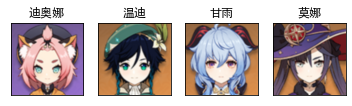












下半
--------------------------------------------------------------------------------
成员：迪奥娜 温迪 甘雨 莫娜
使用率：7.13%


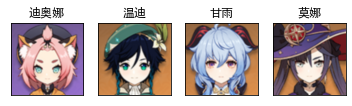

--------------------------------------------------------------------------------
成员：迪奥娜 神里绫华 莫娜 枫原万叶
使用率：4.05%


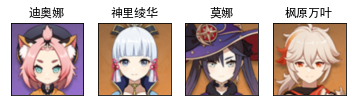

--------------------------------------------------------------------------------
成员：迪奥娜 神里绫华 温迪 莫娜
使用率：3.78%


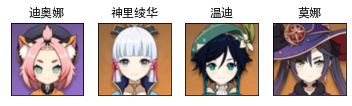

--------------------------------------------------------------------------------
成员：迪奥娜 神里绫华 莫娜 砂糖
使用率：2.36%


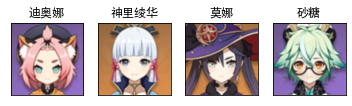

--------------------------------------------------------------------------------
成员：迪奥娜 甘雨 莫娜 枫原万叶
使用率：1.69%


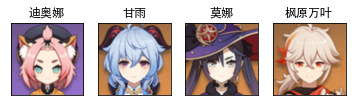

In [2]:
# 筛选要求：必须包含珊瑚宫心海，必须不含班尼特，且必须包含["神里绫华", "甘雨"]中的至少一个
spiralabyss.analyzer.team_builder(
    version="2.6", 
    must_in=["迪奥娜"], 
    must_not_in=["班尼特"], 
    must_include=["神里绫华", "甘雨"],
    tor=1.5
)

# 其他函数

角色筛选器`spiralabyss.analyzer.get_character_list`

参数详解：  
1. `mod`: 必须是字符串，可以是4、5、火、水、冰、岩、风、雷、草的组合，比如'4风'代表4星风系角色，也可以是None。默认是None，也就是返回全部角色。  
1. `exclude`: 必须是列表，表示你需要排除的角色列表。

最终返回的是满足mod的条件，且不在`exclude`列表中的所有角色。

In [33]:
spiralabyss.analyzer.get_character_list(mod='5风', exclude=['温迪'])

['枫原万叶', '魈', '琴']

In [34]:
spiralabyss.analyzer.get_character_list(mod='水')

['神里绫人', '芭芭拉', '珊瑚宫心海', '莫娜', '达达利亚', '行秋']

# 综合案例

需求：查询雷国、莫甘娜的使用率

上半
--------------------------------------------------------------------------------
成员：雷电将军 香菱 班尼特 行秋
使用率：17.17%


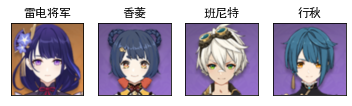












下半
--------------------------------------------------------------------------------
成员：雷电将军 香菱 班尼特 行秋
使用率：0.5%


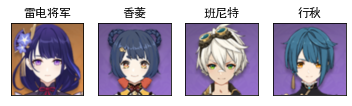

In [44]:
spiralabyss.team_builder(
    version="2.6", 
    must_in=["雷电将军", "香菱", "班尼特", "行秋"],
    tor=0
)

上半
--------------------------------------------------------------------------------
成员：甘雨 莫娜 迪奥娜 温迪
使用率：2.94%


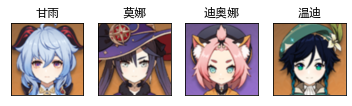












下半
--------------------------------------------------------------------------------
成员：甘雨 莫娜 迪奥娜 温迪
使用率：7.13%


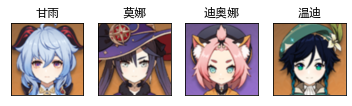

In [45]:
spiralabyss.team_builder(
    version="2.6", 
    must_in=["甘雨", "莫娜", "迪奥娜", "温迪"],
    tor=0
)

需求：上下半路分别的使用率>3%的队伍

上半
--------------------------------------------------------------------------------
成员：香菱 行秋 班尼特 雷电将军
使用率：17.17%


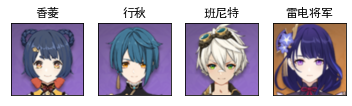

--------------------------------------------------------------------------------
成员：香菱 班尼特 达达利亚 枫原万叶
使用率：4.67%


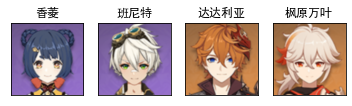

--------------------------------------------------------------------------------
成员：温迪 行秋 班尼特 雷电将军
使用率：3.23%


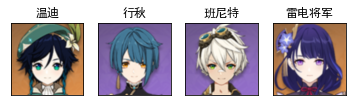












下半
--------------------------------------------------------------------------------
成员：温迪 甘雨 迪奥娜 莫娜
使用率：7.13%


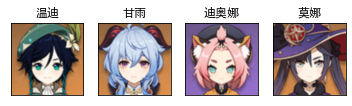

--------------------------------------------------------------------------------
成员：神里绫华 枫原万叶 珊瑚宫心海 申鹤
使用率：5.3%


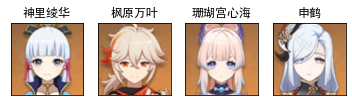

--------------------------------------------------------------------------------
成员：行秋 钟离 重云 胡桃
使用率：4.82%


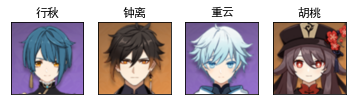

--------------------------------------------------------------------------------
成员：神里绫华 迪奥娜 莫娜 枫原万叶
使用率：4.05%


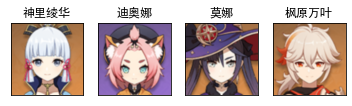

--------------------------------------------------------------------------------
成员：神里绫华 温迪 迪奥娜 莫娜
使用率：3.78%


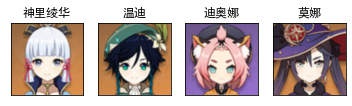

In [46]:
spiralabyss.team_builder(
    version="2.6", 
    tor=3
)

需求：帮优菈组队，要求不能有其他5星角色，且队伍中必须包含一个冰系角色

In [35]:
must_in = ["优菈"]
print(must_in)

['优菈']


In [37]:
must_not_in = spiralabyss.analyzer.get_character_list(mod='5', exclude=must_in)
print(must_not_in)

['阿贝多', '埃洛伊', '神里绫华', '神里绫人', '迪卢克', '甘雨', '胡桃', '荒泷一斗', '琴', '枫原万叶', '刻晴', '可莉', '珊瑚宫心海', '莫娜', '七七', '申鹤', '雷电将军', '达达利亚', '旅行者', '温迪', '魈', '八重神子', '宵宫', '钟离']


In [39]:
must_include = spiralabyss.analyzer.get_character_list(mod='冰', exclude=must_not_in+must_in)
print(must_include)

['重云', '迪奥娜', '凯亚', '罗莎莉亚']


上半











下半
--------------------------------------------------------------------------------
成员：优菈 菲谢尔 迪奥娜 罗莎莉亚
使用率：0.15%


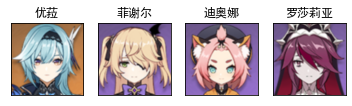

--------------------------------------------------------------------------------
成员：优菈 行秋 迪奥娜 罗莎莉亚
使用率：0.13%


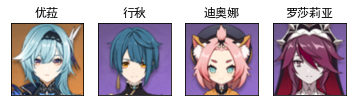

In [41]:
spiralabyss.team_builder(
    version="2.6", 
    must_in=must_in, 
    must_not_in=must_not_in, 
    must_include=must_include,
    tor=0.1
)

上半
--------------------------------------------------------------------------------
成员：魈 芭芭拉 钟离 砂糖
使用率：0.08%


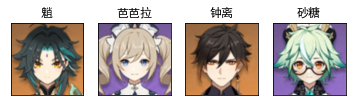

--------------------------------------------------------------------------------
成员：魈 行秋 班尼特 砂糖
使用率：0.08%


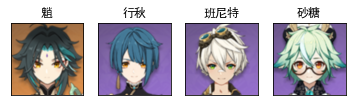

--------------------------------------------------------------------------------
成员：魈 钟离 达达利亚 砂糖
使用率：0.08%


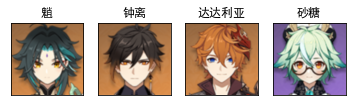

--------------------------------------------------------------------------------
成员：魈 琴 行秋 钟离
使用率：0.06%


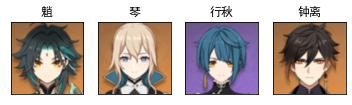

--------------------------------------------------------------------------------
成员：魈 芭芭拉 温迪 钟离
使用率：0.06%


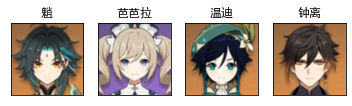

--------------------------------------------------------------------------------
成员：魈 温迪 行秋 钟离
使用率：0.06%


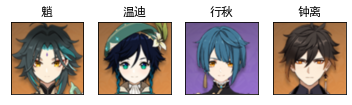

--------------------------------------------------------------------------------
成员：魈 温迪 钟离 莫娜
使用率：0.06%


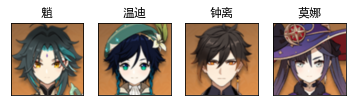

--------------------------------------------------------------------------------
成员：魈 温迪 钟离 珊瑚宫心海
使用率：0.06%


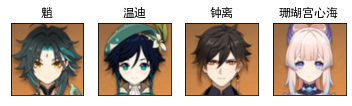

--------------------------------------------------------------------------------
成员：魈 琴 温迪 行秋
使用率：0.04%


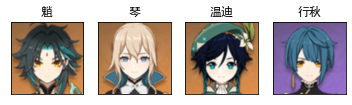

--------------------------------------------------------------------------------
成员：魈 琴 钟离 莫娜
使用率：0.04%


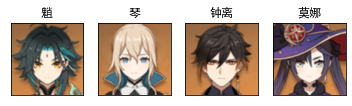

--------------------------------------------------------------------------------
成员：魈 温迪 行秋 班尼特
使用率：0.04%


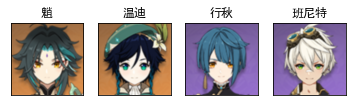

--------------------------------------------------------------------------------
成员：魈 温迪 钟离 达达利亚
使用率：0.04%


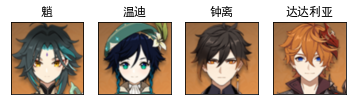

--------------------------------------------------------------------------------
成员：魈 行秋 钟离 班尼特
使用率：0.04%


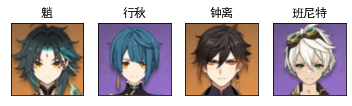

--------------------------------------------------------------------------------
成员：魈 行秋 钟离 雷电将军
使用率：0.04%


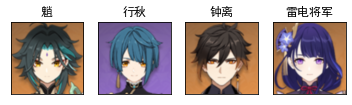

--------------------------------------------------------------------------------
成员：魈 行秋 班尼特 阿贝多
使用率：0.04%


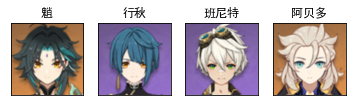

--------------------------------------------------------------------------------
成员：魈 钟离 班尼特 砂糖
使用率：0.04%


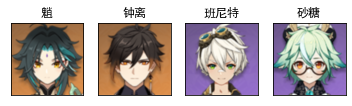

--------------------------------------------------------------------------------
成员：魈 钟离 雷电将军 珊瑚宫心海
使用率：0.04%


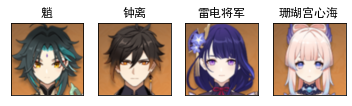

--------------------------------------------------------------------------------
成员：魈 班尼特 砂糖 珊瑚宫心海
使用率：0.04%


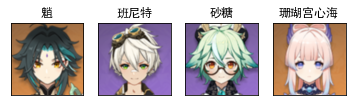

--------------------------------------------------------------------------------
成员：魈 琴 行秋 达达利亚
使用率：0.02%


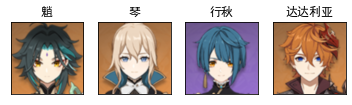

--------------------------------------------------------------------------------
成员：魈 琴 行秋 莫娜
使用率：0.02%


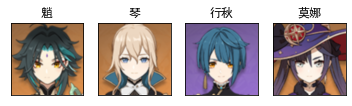

--------------------------------------------------------------------------------
成员：魈 琴 行秋 雷电将军
使用率：0.02%


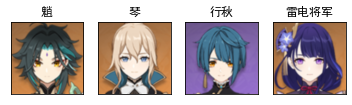

--------------------------------------------------------------------------------
成员：魈 琴 钟离 菲谢尔
使用率：0.02%


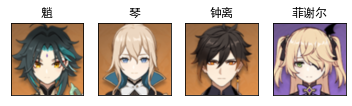

--------------------------------------------------------------------------------
成员：魈 琴 钟离 达达利亚
使用率：0.02%


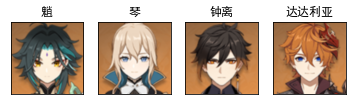

--------------------------------------------------------------------------------
成员：魈 琴 钟离 阿贝多
使用率：0.02%


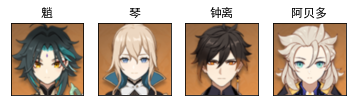

--------------------------------------------------------------------------------
成员：魈 旅行者 芭芭拉 钟离
使用率：0.02%


AssertionError: 

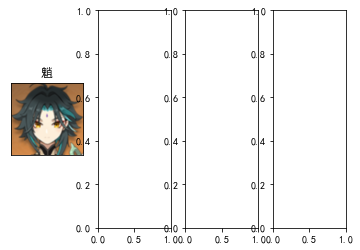

In [6]:
spiralabyss.team_builder(
    version="2.6", 
    must_in=["申鹤"],
    must_not_in=["甘雨",],
    tor=0
)